#  Timescale Ex 3
System given by 
$$x' = \varepsilon (y-x^3), \quad y'=x-y.$$
If you run the animated solution and then want to rerun the whole thing with new initial conditions or a new epsilon, it will 'animate' the first part as well.  If you find this annoying, then go to the Kernal tab, and click 'Restart & Clear Output'.  Otherwise it should still work.  

The stable steady states are at ( 1 , 1 ) and ( -1 , -1 ),  while ( 0 , 0 ) is an unstable steady state.


<IPython.core.display.Javascript object>


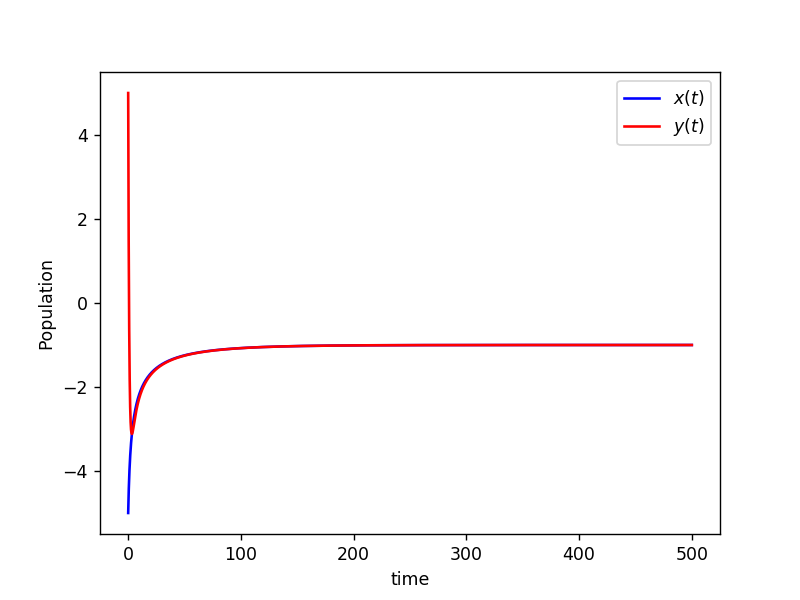

<IPython.core.display.Javascript object>


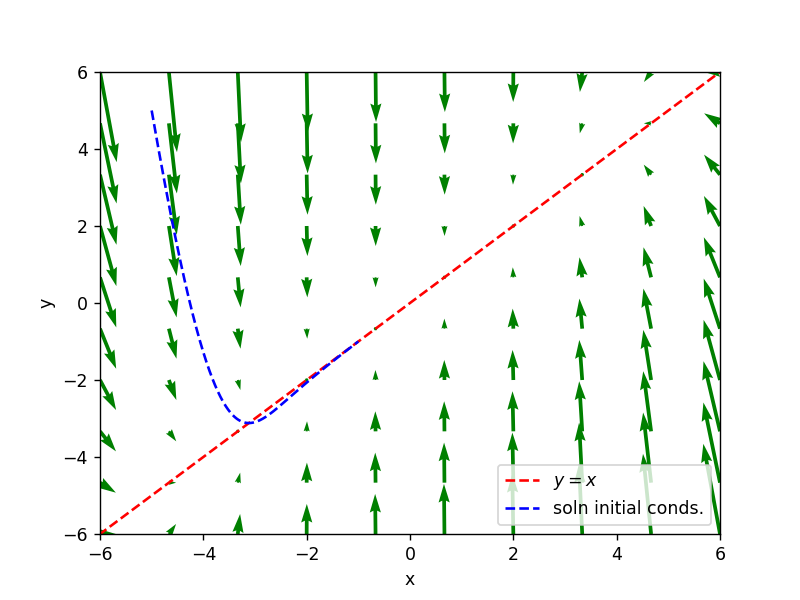

In [4]:
EndTime=500

eps=.01

xinitial=-5
yinitial=5

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(X,t):
    x,y = X
    return np.array([eps*(-x**3+y),x-y])
t=np.linspace(0,EndTime,EndTime*100)
z=odeint(f,[xinitial,yinitial],t)

print("The stable steady states are at (", 1, ",", 1, ") and (", -1, ",", -1, "),  while (", 0, ",", 0, ") is an unstable steady state.")
plt.plot(t,z[:,0],'b-',label=r'$x(t)$')
plt.plot(t,z[:,1],'r-',label=r'$y(t)$')
plt.ylabel('Population')
plt.xlabel('time')
plt.legend(loc='best')
plt.ioff()
plt.show() 

# 2D phase plane S vs. E1
x, y = np.meshgrid(np.linspace(-6, 6,10),
                      np.linspace(-6,6,10))
u = f([x,y],t)[0]
v = f([x,y],t)[1]
quiv=plt.quiver(x,y,u,v,color='g')
plt.xlim((-6,6))
plt.ylim((-6,6))
xx=np.linspace(-15,15,1000)
plt.plot(xx,xx,'r--',label=r'$y=x$')
plt.plot(z[:,0],z[:,1],'b--',label=r'soln initial conds.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

Traceback (most recent call last):
  File "C:\Users\Lora\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Lora\Anaconda3\lib\site-packages\matplotlib\backends\backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "C:\Users\Lora\Anaconda3\lib\site-packages\matplotlib\_pylab_helpers.py", line 54, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "C:\Users\Lora\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Lora\Anaconda3\lib\site-packages\matplotlib\backends\backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "C:\Users\Lora\Anaconda3\lib\site-packages\matplotlib\_pylab_helpers.py", line 54, in destroy
    cls._activeQue.remove(manager

<IPython.core.display.Javascript object>


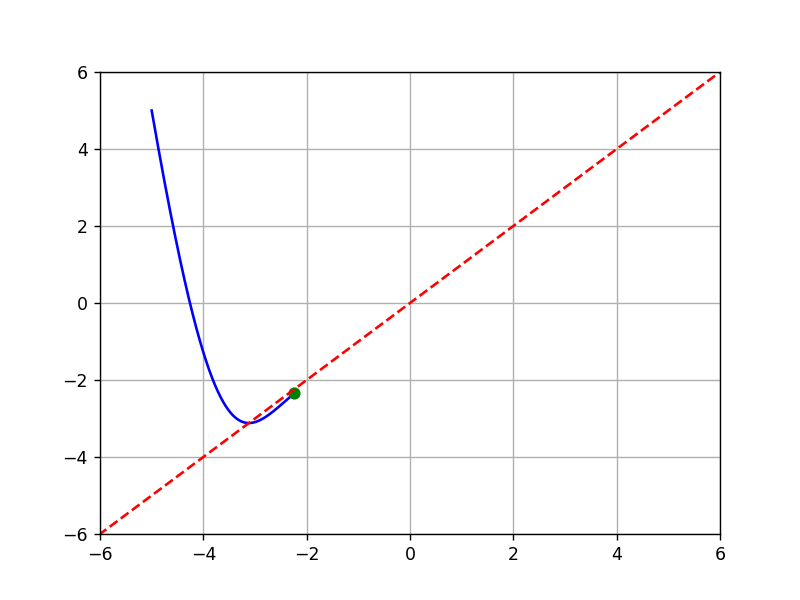

In [5]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([z[0,0]], [z[0,1]], 'b-')
point, = ax.plot([z[0,0], z[0,1]], 'go')
line.set_data(xinitial, yinitial)
point.set_data(z[0,0],z[0,1])
ax.grid()

def animate(i):
    point.set_data(z[i,0],z[i,1])
    line.set_data(z[0:i,0],z[0:i,1])
    return line, 

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.plot(xx,xx,'r--')
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(z)), interval=1)
plt.show()